In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
frags = pd.read_csv('/work/magroup/skrieger/ATAC_motif/data/spatial_atac/GSM5238387_ME13_50um_2.fragments.tsv', sep='\t', header=None)
frags

In [2]:
# Read and preprocess the fragment data
#frags = pd.read_csv('/work/magroup/skrieger/ATAC_motif/data/spatial_atac/GSM5238387_ME13_50um_2.fragments.tsv', sep='\t', header=None)
frags = pd.read_csv('./P21_brain_spatial/GSM6043256_P21_brain_20um_fragments.tsv', sep='\t', comment='#', header=None)

In [3]:
frags = frags.rename(columns={0: 'chromosome',1: 'start', 2: 'end', 3: 'cell',4:'count'})
frags

,chromosome,start,end,cell,count
0,chr1,3000522,3000582,AGCAGGAAAGAGTCAA-1,1
1,chr1,3000584,3000647,ACATTGGCATTGAGGA-1,2
2,chr1,3000592,3000647,CAAGACTACTGGCATA-1,1
3,chr1,3000797,3000941,CTCAATGAGATAGACA-1,4
4,chr1,3001022,3001058,ACAAGCTAACCTCCAA-1,1
...,...,...,...,...,...
23893600,JH584295.1,1799,1976,CATACCAAAACGTGAT-1,4
23893601,JH584295.1,1814,1891,AAGACGGAATTGAGGA-1,3
23893602,JH584295.1,1844,1905,AGTGGTCACTGTAGCC-1,2
23893603,JH584295.1,1910,1955,CAGATCTGAGTCACTA-1,2


In [3]:
import snapatac2 as snap

snap.__version__
%reload_ext autoreload
%autoreload 2

In [4]:
import gc
gc.collect()

43

In [5]:
fragment_file = '/work/magroup/skrieger/ATAC_motif/data/spatial_atac/GSM5238387_ME13_50um_2.fragments.tsv'
#fragment_file = './P21_brain_spatial/GSM6043256_P21_brain_20um_fragments.tsv'
data = snap.pp.import_data(
    fragment_file,
    chrom_sizes=snap.genome.mm10,
    #file="spatial_snapatac.h5ad",  # Optional
    sorted_by_barcode=False,
)
data

AnnData object with n_obs × n_vars = 2500 × 0
    obs: 'n_fragment', 'frac_dup', 'frac_mito'
    uns: 'reference_sequences'
    obsm: 'fragment_paired'

In [6]:
pos = pd.read_csv('/work/magroup/skrieger/ATAC_motif/data/spatial_atac/GSM5238387_ME13_50um_2_spatial/tissue_positions_list.csv', header=None)
#pos = pd.read_csv('./P21_brain_spatial/tissue_positions_list.csv', sep=',', header=None)
pos.index = pos[0]
pos.index = [f'{p}-1' for p in pos.index]
pos = pos.drop(columns=[0])
pos

,1,2,3,4,5
AACGTGATAACGTGAT-1,0,0,0,111,1386
AACGTGATAAACATCG-1,0,1,0,133,1386
AACGTGATATGCCTAA-1,1,2,0,155,1386
AACGTGATAGTGGTCA-1,1,3,0,177,1386
AACGTGATACCACTGT-1,1,4,0,199,1386
...,...,...,...,...,...
GCCACATAGAATCTGA-1,1,45,49,1101,308
GCCACATACAAGACTA-1,1,46,49,1123,308
GCCACATAGAGCTGAA-1,1,47,49,1145,308
GCCACATAGATAGACA-1,1,48,49,1167,308


In [7]:
ad = sc.AnnData(obs=pos)
ad.obsm['spatial'] = pos.loc[:,[3,2]].to_numpy()
ad = ad[ad.obs[1] == 1].copy()
ad.obsm['spatial']

array([[ 0,  2],
       [ 0,  3],
       [ 0,  4],
       ...,
       [49, 47],
       [49, 48],
       [49, 49]])

In [9]:
ad

AnnData object with n_obs × n_vars = 2500 × 0
    obs: 1, 2, 3, 4, 5
    obsm: 'spatial'

In [10]:
data = data[ad.obs_names].copy()
data

AnnData object with n_obs × n_vars = 2201 × 0
    obs: 'n_fragment', 'frac_dup', 'frac_mito'
    uns: 'reference_sequences'
    obsm: 'fragment_paired'

In [11]:
data.obsm['spatial'] = ad.obsm['spatial']

2024-11-01 15:18:30 - INFO - Computing fragment size distribution...


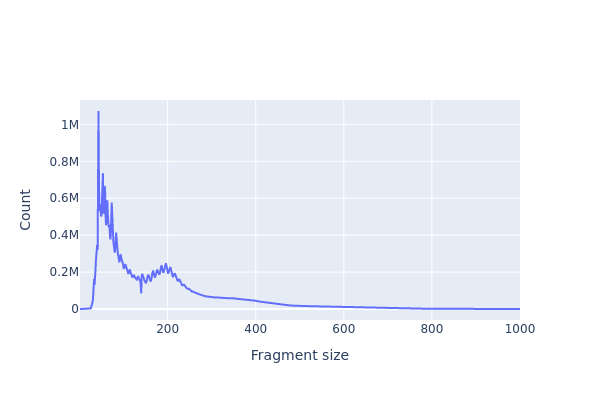

In [12]:
snap.pl.frag_size_distr(data, interactive=False)

In [13]:
snap.metrics.tsse(data, snap.genome.mm10)

/home/xueerd/xueerd/miniconda3/envs/snapatac/lib/python3.11/site-packages/snapatac2/plotting/__init__.py:66: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/home/xueerd/xueerd/miniconda3/envs/snapatac/lib/python3.11/site-packages/snapatac2/plotting/__init__.py:67: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



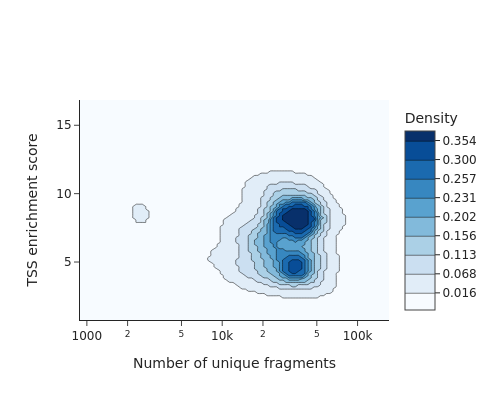

In [14]:
snap.pl.tsse(data, interactive=False)

In [ ]:
snap.pp.filter_cells(data, min_counts=5000, min_tsse=10, max_counts=100000)
data

In [15]:
snap.pp.add_tile_matrix(data, file='spatial_atac_bins.h5ad')

In [20]:
data

AnnData object with n_obs × n_vars = 2201 × 5267565
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse'
    uns: 'reference_sequences', 'frag_size_distr'
    obsm: 'fragment_paired', 'spatial'

In [ ]:
#data.write('spatial_atac_analysis_results.h5ad')

In [25]:
#adata = sc.read_h5ad('spatial_atac.h5ad')

In [16]:
# Extract the matrix (assuming data.X is in a sparse matrix format)
if hasattr(data, 'X'):
    if hasattr(data.X, 'toarray'):
        matrix = data.X.toarray()
    else:
        matrix = np.array(data.X)
else:
    raise ValueError("data.X attribute not found")

print("Matrix shape:", matrix.shape)

# Optionally, you can sample a subset of the matrix if it's too large
if matrix.shape[0] > 1000 or matrix.shape[1] > 1000:
    matrix = matrix[:1000, :1000]  # Adjust the size as needed

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, cmap='viridis')
plt.title('Heatmap of data.X')
plt.xlabel('Bins')
plt.ylabel('Cells')
plt.show()


KeyboardInterrupt



In [ ]:
# smart binning: never break up annotated region
# gencode

In [17]:
snap.pp.select_features(data, n_features=25000)
snap.tl.spectral(data)
snap.tl.umap(data)
snap.pp.knn(data)
snap.tl.leiden(data)

2024-11-01 15:20:10 - INFO - Selected 25000 features.
/home/xueerd/xueerd/miniconda3/envs/snapatac/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

/home/xueerd/xueerd/miniconda3/envs/snapatac/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



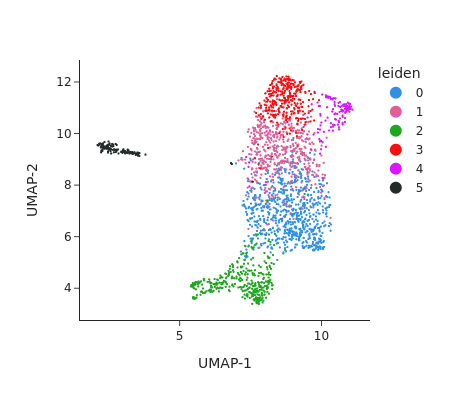

In [23]:
snap.pl.umap(data, color='leiden', interactive=False, height=400, width = 450)

... storing 'leiden' as categorical


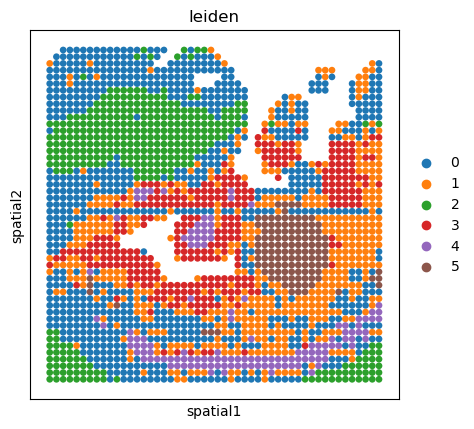

In [24]:
sc.pl.spatial(data, color='leiden', spot_size=1)

In [20]:
data.write_h5ad('P21_brain_spatial/snapatacmousebrain.h5ad')

In [5]:
import anndata as ad
#data = ad.read_h5ad('snapatacmouseembryo2.h5ad')
data = ad.read_h5ad('P21_brain_spatial/snapatacmousebrain.h5ad')

In [5]:
data

AnnData object with n_obs × n_vars = 2201 × 5267565
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'leiden'
    var: 'count', 'selected'
    uns: 'frag_size_distr', 'leiden_colors', 'reference_sequences', 'spectral_eigenvalue'
    obsm: 'X_spectral', 'X_umap', 'fragment_paired', 'spatial'
    obsp: 'distances'

In [6]:
data.var

,count,selected
chr1:0-500,0.0,False
chr1:500-1000,0.0,False
chr1:1000-1500,0.0,False
chr1:1500-2000,0.0,False
chr1:2000-2500,0.0,False
...,...,...
chrX:171029000-171029500,0.0,False
chrX:171029500-171030000,0.0,False
chrX:171030000-171030500,0.0,False
chrX:171030500-171031000,0.0,False


In [10]:
# Subset the data to only include the selected genomic regions
selected_data = data[:, data.var['selected'] == True]


In [62]:
selected_data

View of AnnData object with n_obs × n_vars = 2500 × 25000
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'leiden'
    var: 'count', 'selected'
    uns: 'frag_size_distr', 'leiden_colors', 'reference_sequences', 'spectral_eigenvalue'
    obsm: 'X_spectral', 'X_umap', 'fragment_paired', 'spatial'
    obsp: 'distances'

In [25]:
selected_data.obsm['spatial']

ArrayView([[ 0,  0],
           [ 0,  1],
           [ 0,  2],
           ...,
           [49, 47],
           [49, 48],
           [49, 49]])

# VAE

### if you are trying to reproduce results just start from here

In [2]:
import anndata as ad
#selected_data = ad.read_h5ad('selected_data.h5ad')  % for mouse embryo dataset
selected_data = ad.read_h5ad('snapatacmousebrain.h5ad')


In [3]:
selected_data

AnnData object with n_obs × n_vars = 2201 × 25000
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'leiden', 'leiden_pca', 'leiden_vae', 'leiden_gvae'
    var: 'count', 'selected'
    uns: 'frag_size_distr', 'leiden_colors', 'leiden_gvae', 'leiden_gvae_colors', 'leiden_pca', 'leiden_pca_colors', 'leiden_vae', 'leiden_vae_colors', 'log1p', 'neighbors', 'pca', 'reference_sequences', 'spectral_eigenvalue', 'umap'
    obsm: 'X_emb', 'X_emb_gvae', 'X_pca', 'X_spectral', 'X_umap', 'fragment_paired', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [3]:
selected_data = selected_data[:, selected_data.var['selected'] == True]

/home/xueerd/xueerd/miniconda3/envs/transformer/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


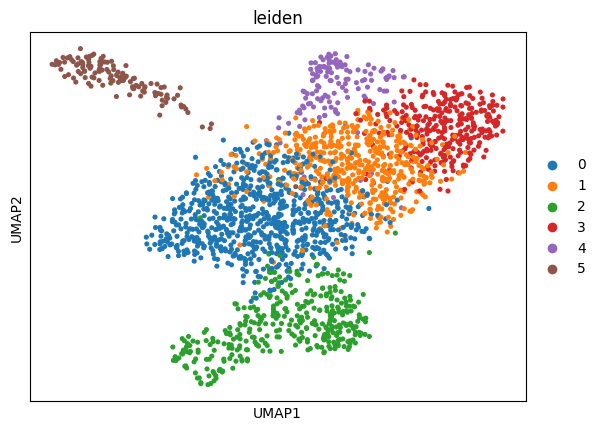

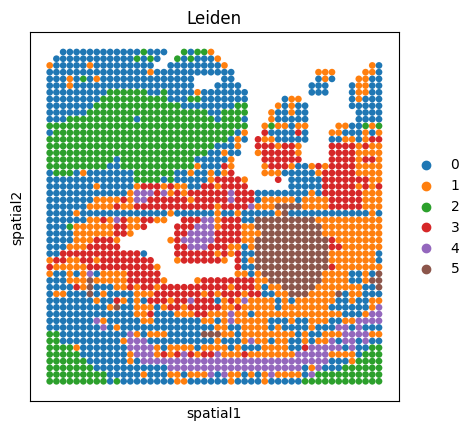

In [12]:
#sc.pp.neighbors(selected_data, n_neighbors=15, use_rep='X_spectral')  # Adjust n_neighbors as needed
#sc.tl.umap(selected_data)  # Compute UMAP if not already computed
sc.pl.umap(selected_data, color='leiden')
sc.pl.spatial(selected_data, color='leiden', spot_size=1, title="Leiden")

In [4]:
# Normalizing to median total counts
sc.pp.normalize_total(selected_data)
sc.pp.scale(selected_data)
# Logarithmize the data
#sc.pp.log1p(selected_data)


/home/xueerd/xueerd/miniconda3/envs/transformer/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [7]:
selected_data

AnnData object with n_obs × n_vars = 2201 × 25000
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'leiden', 'leiden_pca', 'leiden_vae'
    var: 'count', 'selected', 'mean', 'std'
    uns: 'frag_size_distr', 'leiden_colors', 'leiden_pca', 'leiden_pca_colors', 'leiden_vae', 'leiden_vae_colors', 'log1p', 'neighbors', 'pca', 'reference_sequences', 'spectral_eigenvalue', 'umap'
    obsm: 'X_emb', 'X_pca', 'X_spectral', 'X_umap', 'fragment_paired', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

/home/xueerd/xueerd/miniconda3/envs/transformer/lib/python3.12/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 25000 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


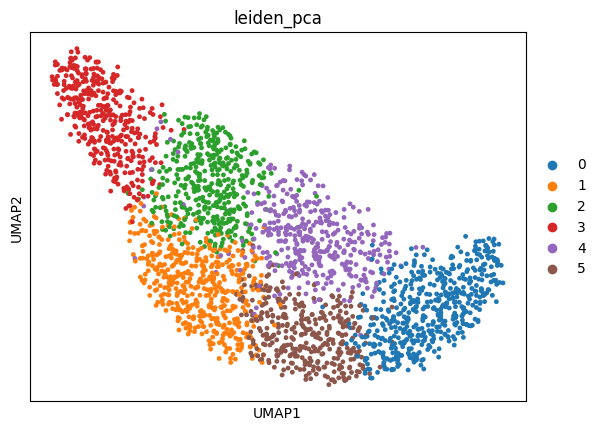

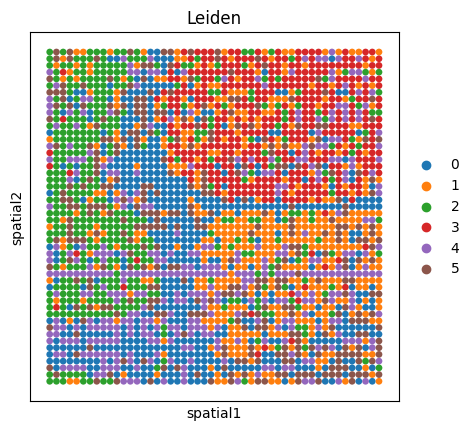

In [107]:
sc.pp.neighbors(selected_data, n_neighbors=15)  # Adjust n_neighbors as needed
sc.tl.leiden(selected_data, resolution=1, key_added='leiden_pca')  # Adjust resolution for different cluster granularity
# You can visualize the clusters using UMAP, colored by the Leiden clusters
sc.tl.umap(selected_data)  # Compute UMAP if not already computed
sc.pl.umap(selected_data, color='leiden_pca')
sc.pl.spatial(selected_data, color='leiden_pca', spot_size=1, title="Leiden")


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
#from torch_geometric.nn import GATConv

%reload_ext autoreload
%autoreload 2

In [16]:
import torch

In [6]:
! module load cuda-11.8

In [8]:
! nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [10]:
torch.version.cuda

'11.8'

In [11]:
! nvidia-smi

Thu Dec  5 14:35:00 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.57.01              Driver Version: 565.57.01      CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100 80GB PCIe          Off |   00000000:4F:00.0 Off |                    0 |
| N/A   28C    P0             44W /  300W |       1MiB /  81920MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [49]:
! lspci | grep -i nvidia

01:00.0 VGA compatible controller: NVIDIA Corporation TU102 [GeForce RTX 2080 Ti] (rev a1)
01:00.1 Audio device: NVIDIA Corporation TU102 High Definition Audio Controller (rev a1)
01:00.2 USB controller: NVIDIA Corporation TU102 USB 3.1 Host Controller (rev a1)
01:00.3 Serial bus controller: NVIDIA Corporation TU102 USB Type-C UCSI Controller (rev a1)
25:00.0 VGA compatible controller: NVIDIA Corporation TU102 [GeForce RTX 2080 Ti] (rev a1)
25:00.1 Audio device: NVIDIA Corporation TU102 High Definition Audio Controller (rev a1)
25:00.2 USB controller: NVIDIA Corporation TU102 USB 3.1 Host Controller (rev a1)
25:00.3 Serial bus controller: NVIDIA Corporation TU102 USB Type-C UCSI Controller (rev a1)
41:00.0 VGA compatible controller: NVIDIA Corporation TU102 [GeForce RTX 2080 Ti] (rev ff)
41:00.1 Audio device: NVIDIA Corporation TU102 High Definition Audio Controller (rev ff)
41:00.2 USB controller: NVIDIA Corporation TU102 USB 3.1 Host Controller (rev ff)
41:00.3 Serial bus controller:

In [50]:
! dmesg | grep -i cuda

[67725.467998] NVRM: _deviceTeardown: Disable of Cuda limit activation failedNVRM: _issueRpcAndWait: rpcSendMessage failed with status 0x0000000f for fn 10!


In [12]:
torch.cuda.is_available()

True

In [7]:
# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("Using CPU")

Using GPU: NVIDIA A100 80GB PCIe


In [9]:
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.LeakyReLU(),
            nn.Linear(512, 256),
            nn.LeakyReLU()
        )

        self.fc_mu = nn.Linear(256, latent_dim)
        self.fc_logvar = nn.Linear(256, latent_dim)
        
        # Decoder layers
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 512),
            nn.LeakyReLU(),
            nn.Linear(512, input_dim),
            #nn.Sigmoid()  # Output activation; change if data has different characteristics
        )
    
    def encode(self, x):
        h = self.encoder(x)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def decode(self, z):
        return self.decoder(z)
    
    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# Define the VAE loss function
def vae_loss(recon_x, x, mu, logvar, total_anneal_epochs=200):
    # MSE
    recon_loss = nn.functional.mse_loss(recon_x, x, reduction='sum')
    # BCE
    #recon_loss = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
    
    # KL divergence loss
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    kl_weight = min(0.2, epoch / total_anneal_epochs)  # Increase from 0 to 1 over `total_anneal_epochs`
    loss = recon_loss + kl_weight * kl_divergence

    
    return loss




In [10]:
# Prepare the data and DataLoader
X_tensor = torch.tensor(selected_data.X, dtype=torch.float32).to(device)  # Move data to device
X_tensor[torch.isnan(X_tensor)] = 0
X_tensor[torch.isinf(X_tensor)] = 0
dataset = TensorDataset(X_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Define model, optimizer, and other parameters
input_dim = X_tensor.shape[1]  # Number of bins
latent_dim = 64  # Dimension of the latent space; adjust based on dataset
model = VAE(input_dim, latent_dim).to(device)  # Move model to device
optimizer = optim.Adam(model.parameters(), lr=1e-4)
epochs = 1000

# Training loop with device support
model.train()
for epoch in range(epochs):
    total_loss = 0
    for batch in dataloader:
        x = batch[0].to(device)  # Move batch to device
        
        # Forward pass
        recon_x, mu, logvar = model(x)
        
        # Compute loss
        loss = vae_loss(recon_x, x, mu, logvar)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    # Print average loss per epoch
    avg_loss = total_loss / len(dataloader.dataset)
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.4f}')

print("Training complete.")

# Extract latent embeddings with device support
model.eval()
with torch.no_grad():
    mu, logvar = model.encode(X_tensor)
    z = model.reparameterize(mu, logvar)
    latent_embeddings = z.cpu().numpy()  # Convert to numpy array if needed


Epoch [1/1000], Loss: 25114.7684
Epoch [2/1000], Loss: 25024.3572
Epoch [3/1000], Loss: 25009.2143
Epoch [4/1000], Loss: 25003.6221
Epoch [5/1000], Loss: 24999.3022
Epoch [6/1000], Loss: 24993.0854
Epoch [7/1000], Loss: 24982.1819
Epoch [8/1000], Loss: 24965.7820
Epoch [9/1000], Loss: 24942.2029
Epoch [10/1000], Loss: 24909.5488
Epoch [11/1000], Loss: 24865.7922
Epoch [12/1000], Loss: 24806.7855
Epoch [13/1000], Loss: 24728.9469
Epoch [14/1000], Loss: 24635.1055
Epoch [15/1000], Loss: 24527.0133
Epoch [16/1000], Loss: 24409.3362
Epoch [17/1000], Loss: 24284.5890
Epoch [18/1000], Loss: 24151.9797
Epoch [19/1000], Loss: 24013.9074
Epoch [20/1000], Loss: 23873.0980
Epoch [21/1000], Loss: 23734.9228
Epoch [22/1000], Loss: 23593.5952
Epoch [23/1000], Loss: 23455.7340
Epoch [24/1000], Loss: 23318.3611
Epoch [25/1000], Loss: 23185.9943
Epoch [26/1000], Loss: 23056.7192
Epoch [27/1000], Loss: 22926.8301
Epoch [28/1000], Loss: 22805.3413
Epoch [29/1000], Loss: 22683.7363
Epoch [30/1000], Loss: 

In [11]:
# Add the learned embeddings as 'X_emb' in the AnnData object
selected_data.obsm['X_emb'] = latent_embeddings


/home/xueerd/xueerd/miniconda3/envs/transformer/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_1404870/822101182.py:4: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(selected_data, resolution=1.1, key_added='leiden_vae')  # Adjust resolution for different cluster granularity


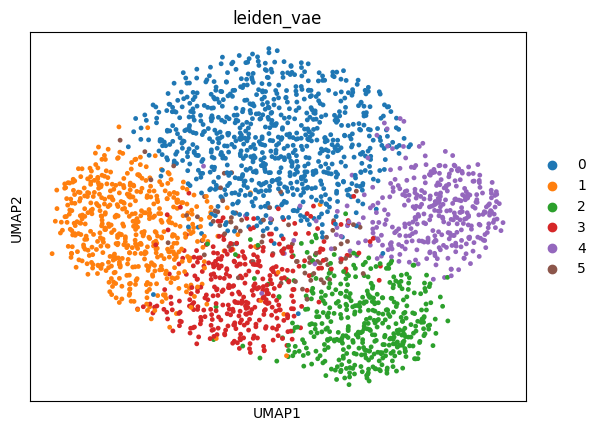

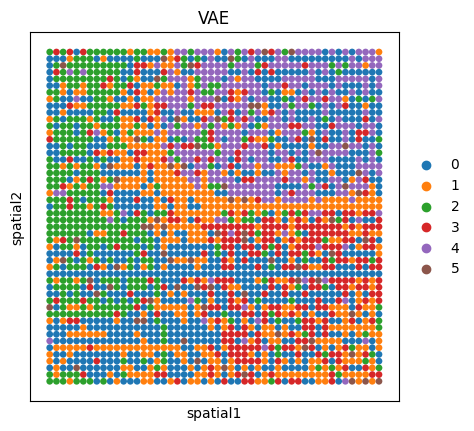

In [12]:
import scanpy as sc

sc.pp.neighbors(selected_data, use_rep='X_emb', n_neighbors=15)  # Adjust n_neighbors as needed
sc.tl.leiden(selected_data, resolution=1.1, key_added='leiden_vae')  # Adjust resolution for different cluster granularity
# You can visualize the clusters using UMAP, colored by the Leiden clusters
sc.tl.umap(selected_data)  # Compute UMAP if not already computed
sc.pl.umap(selected_data, color='leiden_vae')
sc.pl.spatial(selected_data, color='leiden_vae', spot_size=1, title="VAE")


In [105]:
# calculate ARI and NMI
selected_data

AnnData object with n_obs × n_vars = 2500 × 25000
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'leiden', 'leiden_gvae'
    var: 'count', 'selected', 'mean', 'std'
    uns: 'frag_size_distr', 'leiden_colors', 'reference_sequences', 'spectral_eigenvalue', 'neighbors', 'leiden_gvae', 'umap', 'leiden_gvae_colors'
    obsm: 'X_spectral', 'X_umap', 'fragment_paired', 'spatial', 'X_emb_gvae'
    obsp: 'distances', 'connectivities'

In [11]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

# Extract cluster labels from `obs`
leiden_labels = selected_data.obs['leiden']
leiden_pca_labels = selected_data.obs['leiden']

# Extract the latent embeddings or feature space
latent_embeddings = selected_data.obsm['X_spectral']  # Replace 'X_gvae' with the actual key for your latent embeddings

# Calculate ARI
ari_score = adjusted_rand_score(leiden_labels, leiden_pca_labels)

# Calculate NMI
nmi_score = normalized_mutual_info_score(leiden_labels, leiden_pca_labels)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(latent_embeddings, leiden_pca_labels)

print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi_score:.4f}")
print(f"Silhouette Score: {silhouette_avg:.4f}")

Adjusted Rand Index (ARI): 0.3088
Normalized Mutual Information (NMI): 0.4659
Silhouette Score: 0.0421


In [12]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

# Extract cluster labels from `obs`
leiden_labels = selected_data.obs['leiden']
leiden_pca_labels = selected_data.obs['leiden_pca']

# Extract the latent embeddings or feature space
latent_embeddings = selected_data.obsm['X_umap']  # Replace 'X_gvae' with the actual key for your latent embeddings

# Calculate ARI
ari_score = adjusted_rand_score(leiden_labels, leiden_pca_labels)

# Calculate NMI
nmi_score = normalized_mutual_info_score(leiden_labels, leiden_pca_labels)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(latent_embeddings, leiden_pca_labels)

print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi_score:.4f}")
print(f"Silhouette Score: {silhouette_avg:.4f}")

Adjusted Rand Index (ARI): 0.2951
Normalized Mutual Information (NMI): 0.3538
Silhouette Score: 0.0336


In [14]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

# Extract cluster labels from `obs`
leiden_labels = selected_data.obs['leiden']
leiden_pca_labels = selected_data.obs['leiden_vae']

# Extract the latent embeddings or feature space
latent_embeddings = selected_data.obsm['X_emb']  # Replace 'X_gvae' with the actual key for your latent embeddings

# Calculate ARI
ari_score = adjusted_rand_score(leiden_labels, leiden_pca_labels)

# Calculate NMI
nmi_score = normalized_mutual_info_score(leiden_labels, leiden_pca_labels)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(latent_embeddings, leiden_pca_labels)

print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi_score:.4f}")
print(f"Silhouette Score: {silhouette_avg:.4f}")

Adjusted Rand Index (ARI): 0.3329
Normalized Mutual Information (NMI): 0.3415
Silhouette Score: -0.1175


In [ ]:
selected_data.write("P21_brain_spatial/mousebrain_selected_data.h5ad")  # kmer_mouseembryo2_k5t3_vae
#selected_data.write("P21_brain_spatial/kmer_mousebrain_k4t2_vae.h5ad")

In [15]:
import torch
import torch.nn as nn
from torch_geometric.nn import GCNConv
from torch.utils.data import DataLoader, TensorDataset

class VAE_GCN(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE_GCN, self).__init__()
        # Define GCN layer
        self.gcn = GCNConv(input_dim, 256)
        
        # Fully connected layers in the encoder after GCN
        self.encoder_fc = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim * 2)  # Output both mu and logvar in a single layer
        )
        
        # Fully connected layers in the decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, input_dim),
            nn.Sigmoid()
        )
    
    def encode(self, x, edge_index):
        # Apply GCN layer to capture spatial dependencies
        h = self.gcn(x, edge_index)
        
        # Pass through the encoder fully connected layers
        h = self.encoder_fc(h)
        
        # Split the output for mu and logvar
        mu, logvar = h[:, :latent_dim], h[:, latent_dim:]
        return mu, logvar
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def decode(self, z):
        return self.decoder(z)
    
    def forward(self, x, edge_index):
        mu, logvar = self.encode(x, edge_index)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# Define the VAE loss function
def vae_loss(recon_x, x, mu, logvar, epoch, total_anneal_epochs=200):
    # Reconstruction loss using MSE for count data
    recon_loss = nn.functional.mse_loss(recon_x, x, reduction='sum')
    #recon_loss = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
    
    # KL divergence loss
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    kl_weight = min(0.2 , epoch / total_anneal_epochs)  # Increase from 0 to 1 over `total_anneal_epochs`
    return recon_loss + kl_weight * kl_divergence


In [16]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import torch
from torch_geometric.utils import dense_to_sparse

# Extract spatial coordinates
spatial_coords = selected_data.obsm['spatial']

# Define the number of nearest neighbors (adjust as needed)
k_neighbors = 8

# Compute the k-nearest neighbors
nbrs = NearestNeighbors(n_neighbors=k_neighbors + 1, algorithm='ball_tree').fit(spatial_coords)
distances, indices = nbrs.kneighbors(spatial_coords)

# Create a connectivity matrix from the k-NN results
n_cells = spatial_coords.shape[0]
connectivities = np.zeros((n_cells, n_cells))

# Populate the connectivity matrix
for i, neighbors in enumerate(indices):
    connectivities[i, neighbors[1:]] = 1  # Skip the first neighbor (itself)

# Add self-connections by setting the diagonal to 1
np.fill_diagonal(connectivities, 1)

# Convert to a sparse tensor and move to device
connectivities = torch.tensor(connectivities, dtype=torch.float32)
edge_index, _ = dense_to_sparse(connectivities)
edge_index = edge_index.to(device)


In [19]:
import torch.optim as optim
from torch_geometric.utils import subgraph
import gc

gc.collect()
torch.cuda.empty_cache()

# Prepare the data and DataLoader
X_tensor = torch.tensor(selected_data.X, dtype=torch.float32).to(device)  # Move data to device
#X_tensor[torch.isnan(X_tensor)] = 0
#X_tensor[torch.isinf(X_tensor)] = 0
dataset = TensorDataset(X_tensor, torch.arange(X_tensor.size(0)))  # Add indices for subgraph sampling
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define model, optimizer, and other parameters
input_dim = X_tensor.shape[1]  # Number of bins
latent_dim = 64  # Dimension of the latent space; adjust based on dataset
model = VAE_GCN(input_dim, latent_dim).to(device)  # Move model to device
optimizer = optim.Adam(model.parameters(), lr=1e-4)
epochs = 1000

# Training loop with device support
model.train()
for epoch in range(epochs):
    total_loss = 0
    for batch in dataloader:
        x, batch_node_indices = batch
        x = x.to(device)
        batch_node_indices = batch_node_indices.to(device)
        
        # Generate `batch_edge_index` for the current batch
        batch_edge_index, _ = subgraph(
            batch_node_indices,
            edge_index,  # Original edge_index
            relabel_nodes=True,
            num_nodes=selected_data.n_obs  # Total number of cells in the dataset
        )
        
        # Forward pass with GCN using the batch-specific edge_index
        recon_x, mu, logvar = model(x, batch_edge_index.to(device))
        
        # Compute loss
        loss = vae_loss(recon_x, x, mu, logvar, epoch)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    # Print average loss per epoch
    avg_loss = total_loss / len(dataloader.dataset)
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.4f}')

print("Training complete.")

# Extract latent embeddings with device support
model.eval()
with torch.no_grad():
    mu, logvar = model.encode(X_tensor, edge_index.to(device))
    z = model.reparameterize(mu, logvar)
    latent_embeddings = z.cpu().numpy()  # Convert to numpy array if needed


Epoch [1/1000], Loss: 29842.1092
Epoch [2/1000], Loss: 25245.9174
Epoch [3/1000], Loss: 24998.9329
Epoch [4/1000], Loss: 24994.9524
Epoch [5/1000], Loss: 24994.2560
Epoch [6/1000], Loss: 24994.2861
Epoch [7/1000], Loss: 24994.5470
Epoch [8/1000], Loss: 24994.9921
Epoch [9/1000], Loss: 24995.0144
Epoch [10/1000], Loss: 24995.4528
Epoch [11/1000], Loss: 24995.5010
Epoch [12/1000], Loss: 24995.5971
Epoch [13/1000], Loss: 24995.7321
Epoch [14/1000], Loss: 24995.8450
Epoch [15/1000], Loss: 24995.7604
Epoch [16/1000], Loss: 24995.7496
Epoch [17/1000], Loss: 24995.7158
Epoch [18/1000], Loss: 24995.9000
Epoch [19/1000], Loss: 24995.4198
Epoch [20/1000], Loss: 24995.4965
Epoch [21/1000], Loss: 24995.4774
Epoch [22/1000], Loss: 24995.5071
Epoch [23/1000], Loss: 24995.2311
Epoch [24/1000], Loss: 24995.0332
Epoch [25/1000], Loss: 24994.7077
Epoch [26/1000], Loss: 24994.8136
Epoch [27/1000], Loss: 24994.9387
Epoch [28/1000], Loss: 24994.6989
Epoch [29/1000], Loss: 24994.5148
Epoch [30/1000], Loss: 

In [20]:
# Add the learned embeddings as 'X_emb' in the AnnData object
selected_data.obsm['X_emb_gvae'] = latent_embeddings


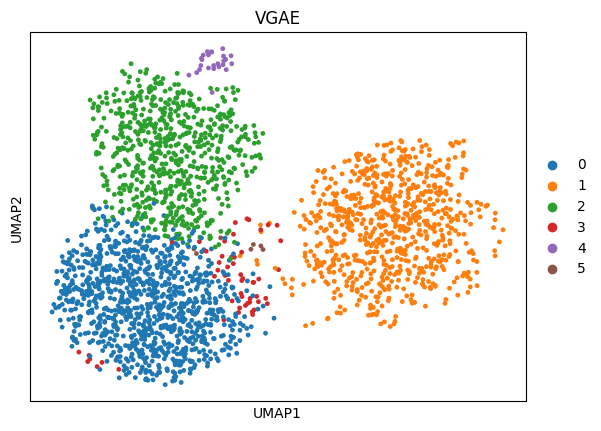

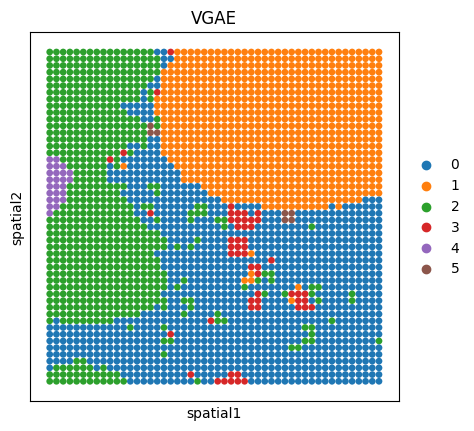

In [29]:
import scanpy as sc

sc.pp.neighbors(selected_data, use_rep='X_emb_gvae', n_neighbors=15)  # Adjust n_neighbors as needed
sc.tl.leiden(selected_data, resolution=0.85, key_added='leiden_gvae')  # Adjust resolution for different cluster granularity
# You can visualize the clusters using UMAP, colored by the Leiden clusters
sc.tl.umap(selected_data)  # Compute UMAP if not already computed
sc.pl.umap(selected_data, color='leiden_gvae', title="VGAE")
sc.pl.spatial(selected_data, color='leiden_gvae', spot_size=1, title="VGAE")


In [30]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

# Extract cluster labels from `obs`
leiden_labels = selected_data.obs['leiden']
leiden_pca_labels = selected_data.obs['leiden_gvae']

# Extract the latent embeddings or feature space
latent_embeddings = selected_data.obsm['X_emb_gvae']  # Replace 'X_gvae' with the actual key for your latent embeddings

# Calculate ARI
ari_score = adjusted_rand_score(leiden_labels, leiden_pca_labels)

# Calculate NMI
nmi_score = normalized_mutual_info_score(leiden_labels, leiden_pca_labels)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(latent_embeddings, leiden_pca_labels)

print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi_score:.4f}")
print(f"Silhouette Score: {silhouette_avg:.4f}")

Adjusted Rand Index (ARI): 0.2423
Normalized Mutual Information (NMI): 0.3215
Silhouette Score: 0.0256


In [18]:
import torch
import gc

# Empty the cache of PyTorch to free up GPU memory
torch.cuda.empty_cache()

# Run garbage collection to free up unused memory in Python
gc.collect()

# If using multiple GPUs, specify the GPU you want to clear
# Uncomment the line below if you are using multiple GPUs
# torch.cuda.set_device(0)  # Change the device ID as needed

# If any tensors still occupy memory, clear them
for obj in gc.get_objects():
    try:
        if torch.is_tensor(obj):
            del obj
    except Exception as e:
        pass


# Check memory usage after clearing
print(torch.cuda.memory_summary(device=None, abbreviated=False))  # To print memory summary


|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      | 669074 KiB | 779918 KiB |   9241 GiB |   9240 GiB |
|       from large pool | 660781 KiB | 773281 KiB |   8792 GiB |   8791 GiB |
|       from small pool |   8293 KiB |   9816 KiB |    449 GiB |    448 GiB |
|---------------------------------------------------------------------------|
| Active memory         | 669074 KiB | 779918 KiB |   9241 GiB |   9240 GiB |
|       from large pool | 660781 KiB | 773281 KiB |   8792 GiB |

In [74]:
import torch
import torch.nn as nn
from torch_geometric.nn import GATConv
from torch.utils.data import DataLoader, TensorDataset

class VAE_GAT(nn.Module):
    def __init__(self, input_dim, latent_dim, heads=1):
        super(VAE_GAT, self).__init__()
        # Define GAT layer
        self.gat = GATConv(input_dim, 256, heads=heads, concat=True)
        
        # Fully connected layers in the encoder after GAT
        self.encoder_fc = nn.Sequential(
            nn.Linear(256 * heads, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim * 2)  # Output both mu and logvar in a single layer
        )
        
        # Fully connected layers in the decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, input_dim),
            nn.Sigmoid()
        )
    
    def encode(self, x, edge_index):
        # Apply GAT layer to capture spatial dependencies with attention
        h = self.gat(x, edge_index)
        
        # Pass through the encoder fully connected layers
        h = self.encoder_fc(h)
        
        # Split the output for mu and logvar
        mu, logvar = h[:, :latent_dim], h[:, latent_dim:]
        return mu, logvar
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def decode(self, z):
        return self.decoder(z)
    
    def forward(self, x, edge_index):
        mu, logvar = self.encode(x, edge_index)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar
        
# Define the VAE loss function
def vae_loss(recon_x, x, mu, logvar, epoch, total_anneal_epochs=200):
    # Reconstruction loss using MSE for count data
    recon_loss = nn.functional.mse_loss(recon_x, x, reduction='sum')
    #recon_loss = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
    
    # KL divergence loss
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    kl_weight = min(0.2, epoch / total_anneal_epochs)  # Increase from 0 to 1 over `total_anneal_epochs`
    return recon_loss + kl_weight * kl_divergence


In [75]:
import torch.optim as optim
from torch_geometric.utils import subgraph
from torch.utils.data import DataLoader, TensorDataset

# Prepare the data and DataLoader
X_tensor = torch.tensor(selected_data.X, dtype=torch.float32).to(device)  # Convert sparse matrix to dense
dataset = TensorDataset(X_tensor, torch.arange(X_tensor.size(0)))  # Include indices for subgraph sampling
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define model, optimizer, and parameters
input_dim = X_tensor.shape[1]  # Number of bins
latent_dim = 64  # Latent space dimension
heads = 4  # Number of attention heads in GAT
model = VAE_GAT(input_dim, latent_dim, heads=heads).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4)
epochs = 1000

# Training loop
model.train()
for epoch in range(epochs):
    total_loss = 0
    for batch in dataloader:
        x, batch_node_indices = batch
        x = x.to(device)
        batch_node_indices = batch_node_indices.to(device)
        
        # Generate `batch_edge_index` for the current batch
        batch_edge_index, _ = subgraph(
            batch_node_indices,
            edge_index,  # Original edge_index from the entire graph
            relabel_nodes=True,
            num_nodes=selected_data.n_obs  # Total number of cells in the dataset
        )
        
        # Forward pass with GAT
        recon_x, mu, logvar = model(x, batch_edge_index.to(device))
        
        # Compute loss
        loss = vae_loss(recon_x, x, mu, logvar, epoch)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    # Print average loss per epoch
    avg_loss = total_loss / len(dataloader.dataset)
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.4f}")

print("Training complete.")

# Extract latent embeddings
model.eval()
with torch.no_grad():
    mu, logvar = model.encode(X_tensor, edge_index.to(device))
    z = model.reparameterize(mu, logvar)
    latent_embeddings = z.cpu().numpy()  # Convert to numpy array if needed


Epoch [1/1000], Loss: 30205.9042
Epoch [2/1000], Loss: 25450.7761
Epoch [3/1000], Loss: 25118.1722
Epoch [4/1000], Loss: 25001.0257
Epoch [5/1000], Loss: 24995.9728
Epoch [6/1000], Loss: 24995.7621
Epoch [7/1000], Loss: 24995.9852
Epoch [8/1000], Loss: 24996.5438
Epoch [9/1000], Loss: 24996.8071
Epoch [10/1000], Loss: 24997.1548
Epoch [11/1000], Loss: 24997.2411
Epoch [12/1000], Loss: 24997.5312
Epoch [13/1000], Loss: 24997.6361
Epoch [14/1000], Loss: 24997.4569
Epoch [15/1000], Loss: 24997.5406
Epoch [16/1000], Loss: 24997.4472
Epoch [17/1000], Loss: 24997.4404
Epoch [18/1000], Loss: 24997.4445
Epoch [19/1000], Loss: 24997.2831
Epoch [20/1000], Loss: 24996.9975
Epoch [21/1000], Loss: 24997.0201
Epoch [22/1000], Loss: 24996.8174
Epoch [23/1000], Loss: 24996.6964
Epoch [24/1000], Loss: 24996.6983
Epoch [25/1000], Loss: 24996.4623
Epoch [26/1000], Loss: 24996.3271
Epoch [27/1000], Loss: 24996.0850
Epoch [28/1000], Loss: 24995.9443
Epoch [29/1000], Loss: 24995.6277
Epoch [30/1000], Loss: 

In [76]:
# Add the learned embeddings as 'X_emb' in the AnnData object
selected_data.obsm['X_emb_gat'] = latent_embeddings


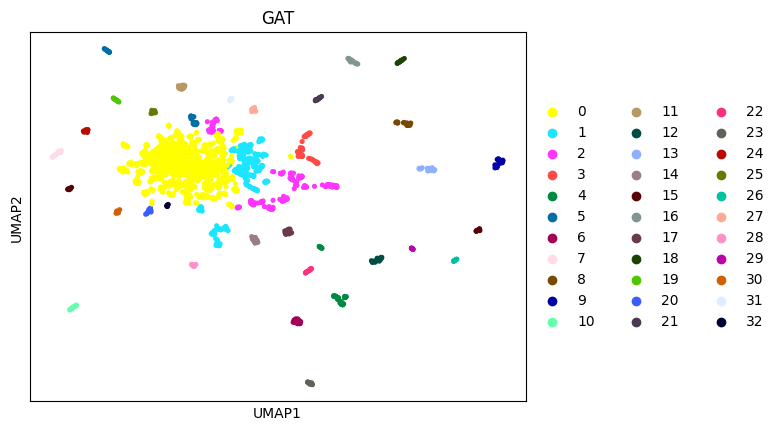

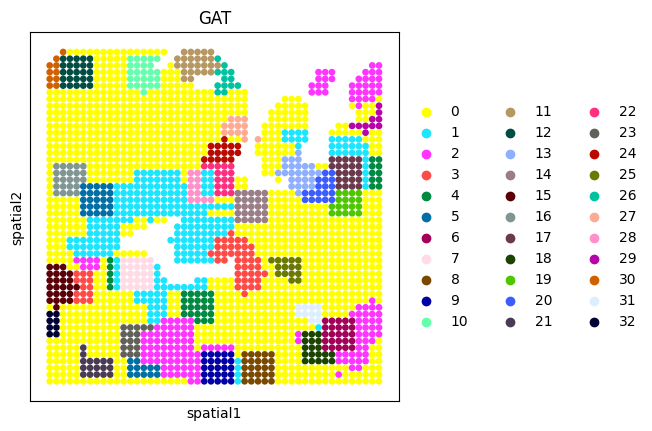

In [77]:
import scanpy as sc

sc.pp.neighbors(selected_data, use_rep='X_emb_gat', n_neighbors=15)  # Adjust n_neighbors as needed
sc.tl.leiden(selected_data, resolution=0.1, key_added='leiden_gat')  # Adjust resolution for different cluster granularity
# You can visualize the clusters using UMAP, colored by the Leiden clusters
sc.tl.umap(selected_data)  # Compute UMAP if not already computed
sc.pl.umap(selected_data, color='leiden_gat', title="GAT")
sc.pl.spatial(selected_data, color='leiden_gat', spot_size=1, title="GAT")


In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Extract cluster labels from `obs`
leiden_labels = selected_data.obs['leiden']
leiden_pca_labels = selected_data.obs['leiden_gvae']

# Calculate ARI
ari_score = adjusted_rand_score(leiden_labels, leiden_pca_labels)

# Calculate NMI
nmi_score = normalized_mutual_info_score(leiden_labels, leiden_pca_labels)

print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi_score:.4f}")